NOTICE: All rate are obtained from [nerdwallet](https://www.nerdwallet.com/blog/nonprofits/donate-charities-corporations/) post accessed on Nov. 5 2016 and using $0.47 as the stamp price. These may be slightly out of date, so do due diligence when deciding how to donate to your money. If you notice anything wrong, feel free to post an issue on github, email me about it, or other ways of communication.

In [1]:
import pandas as pd
import numpy as np
import plot_tools # available at github.com/goldmanm/tools
%matplotlib inline
from matplotlib import pyplot as plt

In [6]:
import seaborn as sns
color_palette = sns.mpl_palette('jet',10)
sns.set(palette=color_palette,font_scale=2)
plot_tools.use_tex()

In [10]:
fees = pd.DataFrame([[.0225, 0],
                    [.022,.3],
                    [.045,.35],
                    [.0475,0],
                    [.079,.3],
                    [.02,.1],
                    [.0145,.05],
                    [.0135,.05],
                    [.0065,.15],
                    [0,.47]],columns=['fractional fee','base fee'],
                   index=['AmEx \& Discover giving program',
                         'paypal (small charities)',
                         'JustGive on their site',
                         'Charity Navigator',
                         'GoFundMe',
                         'Credit MasterCard directly to charity',
                         'Debit MasterCard directly to charity',
                         'Credit Visa directly to charity',
                         'Debit Visa transaction online (smaller bank)',
                         'stamp for mailing a check'])
fees = fees.sort_values('fractional fee')
fees

,fractional fee,base fee
stamp for mailing a check,0.0000,0.47
Debit Visa transaction online (smaller bank),0.0065,0.15
Credit Visa directly to charity,0.0135,0.05
Debit MasterCard directly to charity,0.0145,0.05
Credit MasterCard directly to charity,0.0200,0.10
paypal (small charities),0.0220,0.30
AmEx \& Discover giving program,0.0225,0.00
JustGive on their site,0.0450,0.35
Charity Navigator,0.0475,0.00
GoFundMe,0.0790,0.30


In [8]:
donation_amount = np.logspace(0,4)
fractional_fees = np.outer(donation_amount, fees['fractional fee'])
fractional_fees = pd.DataFrame(fractional_fees,index=donation_amount,columns=fees.index)
total_fees = fractional_fees + fees['base fee']

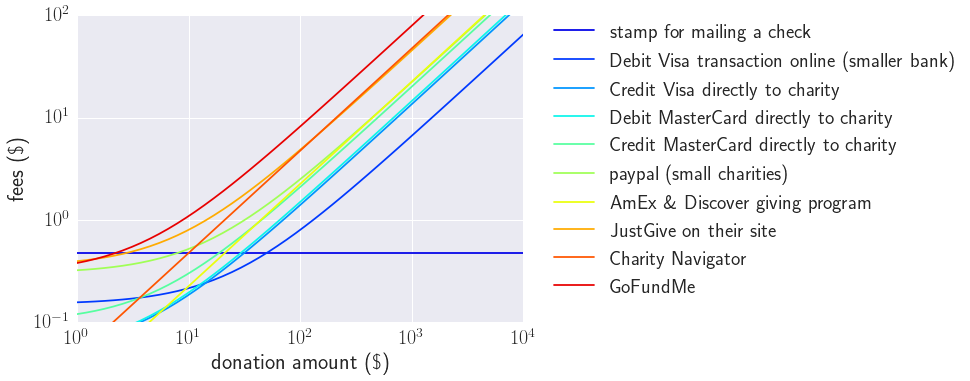

In [9]:
ax = total_fees.plot()
plot_tools.place_legend_outside_plot(ax)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('donation amount (\$)')
plt.ylabel('fees (\$)')
plt.ylim(.1,100)